# The Affordale Care Act on Healthcare Spending and Consumption of Low and High Income Households

In [185]:
import pandas as pd
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer, LineLocation
import statsmodels.formula.api as smf
import numpy as np
import yaml
from typing import Dict

In [186]:
raw_df = pd.read_csv('data/raw/nhis_00004.csv')

C:\Users\justi\AppData\Local\Temp\ipykernel_112092\1386976956.py:1: DtypeWarning: Columns (5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('data/raw/nhis_00004.csv')


In [187]:
variables = ["REGION", "YEAR", "LIVINGQTR", "RACEA", "EDUCREC2", "POORYN", "INCIMPPOINT1", "POVERTY", "YBARDENTAL", "YBARGLASS", "YBARMEDS", "VACFLUSH12M", "NUMPREC"]
selection = raw_df[variables].copy()

In [188]:
selection = selection.dropna()

In [189]:
selection

,REGION,YEAR,LIVINGQTR,RACEA,EDUCREC2,POORYN,INCIMPPOINT1,POVERTY,YBARDENTAL,YBARGLASS,YBARMEDS,VACFLUSH12M,NUMPREC
805737,3,2009,21.0,200.0,51.0,1.0,24000.0,31,1.0,1.0,1,1.0,1.0
805738,3,2009,21.0,100.0,41.0,9.0,23325.0,99,1.0,1.0,1,1.0,2.0
805739,3,2009,21.0,100.0,41.0,9.0,23325.0,99,0.0,0.0,0,0.0,2.0
805740,3,2009,21.0,100.0,51.0,1.0,30000.0,22,2.0,2.0,2,2.0,4.0
805741,3,2009,21.0,100.0,20.0,1.0,30000.0,22,1.0,1.0,1,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762654,3,2018,21.0,200.0,31.0,2.0,7870.0,14,8.0,8.0,8,8.0,1.0
1762655,3,2018,21.0,100.0,54.0,2.0,4000.0,11,1.0,1.0,1,1.0,1.0
1762656,2,2018,21.0,100.0,54.0,1.0,162000.0,37,1.0,1.0,1,2.0,2.0
1762657,2,2018,21.0,100.0,54.0,1.0,162000.0,37,0.0,0.0,0,0.0,2.0


In [190]:
# Filtering the Data
for i in ["YBARDENTAL", "YBARGLASS","YBARMEDS", "VACFLUSH12M", "EDUCREC2"]:
    filt = (selection[i] != 0)
    selection = selection[filt]
for i in ["YBARDENTAL", "YBARGLASS","YBARMEDS", "VACFLUSH12M"]:
    filt = (selection[i] != 7)
    selection = selection[filt]
for i in ["YBARDENTAL", "YBARGLASS","YBARMEDS", "VACFLUSH12M", "REGION"]:
    filt = (selection[i] != 8)
    selection = selection[filt]
for i in ["YBARDENTAL", "YBARGLASS","YBARMEDS", "VACFLUSH12M", "POORYN", "REGION"]:
    filt = (selection[i] != 9)
    selection = selection[filt]
    
filt = (selection["RACEA"] != 580)
selection = selection[filt]

filt = (selection["EDUCREC2"] < 90)
selection = selection[filt]


# Modifying the values to return words not numbers.
selection["EDUCREC2"] = selection["EDUCREC2"].replace(10, "No Education")
selection["EDUCREC2"] = selection["EDUCREC2"].replace(20, "Middle School")
selection["EDUCREC2"] = selection["EDUCREC2"].replace(31, "Middle School")
selection["EDUCREC2"] = selection["EDUCREC2"].replace(32, "Middle School")
selection["EDUCREC2"] = selection["EDUCREC2"].replace(41, "High School")
selection["EDUCREC2"] = selection["EDUCREC2"].replace(42, "High School")
selection["EDUCREC2"] = selection["EDUCREC2"].replace(51, "College Degree")
selection["EDUCREC2"] = selection["EDUCREC2"].replace(54, "Bachelor Degree")
selection["EDUCREC2"] = selection["EDUCREC2"].replace(60, "Higher than Bachelor Degree")

selection["RACEA"] = selection["RACEA"].replace(100, "White")
selection["RACEA"] = selection["RACEA"].replace(200, "Black/African American")
selection["RACEA"] = selection["RACEA"].replace(310, "Native American")
selection["RACEA"] = selection["RACEA"].replace(411, "Chinese")
selection["RACEA"] = selection["RACEA"].replace(412, "Filipino")
selection["RACEA"] = selection["RACEA"].replace(416, "Asian Indian")
selection["RACEA"] = selection["RACEA"].replace(434, "Other Asian")
selection["RACEA"] = selection["RACEA"].replace(600, "Multiple")

# Calculate income per individual
selection["INCOMEPERIND"] = selection["INCIMPPOINT1"] / selection["NUMPREC"]

# Create an ACA variable which selects individuals below 400 % of the poverty threshold
selection["ACA"] = np.where(selection["POVERTY"] < 35, 1, 0)

selection

,REGION,YEAR,LIVINGQTR,RACEA,EDUCREC2,POORYN,INCIMPPOINT1,POVERTY,YBARDENTAL,YBARGLASS,YBARMEDS,VACFLUSH12M,NUMPREC,INCOMEPERIND,ACA
805737,3,2009,21.0,Black/African American,College Degree,1.0,24000.0,31,1.0,1.0,1,1.0,1.0,24000.000000,1
805740,3,2009,21.0,White,College Degree,1.0,30000.0,22,2.0,2.0,2,2.0,4.0,7500.000000,1
805741,3,2009,21.0,White,Middle School,1.0,30000.0,22,1.0,1.0,1,1.0,4.0,7500.000000,1
805747,3,2009,21.0,White,Bachelor Degree,1.0,115000.0,37,1.0,1.0,1,2.0,4.0,28750.000000,0
805750,4,2009,21.0,White,College Degree,1.0,42000.0,33,1.0,1.0,1,1.0,2.0,21000.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762652,2,2018,21.0,White,College Degree,2.0,3500.0,11,1.0,1.0,1,1.0,3.0,1166.666667,1
1762653,2,2018,21.0,White,College Degree,2.0,5000.0,11,1.0,1.0,1,2.0,3.0,1666.666667,1
1762655,3,2018,21.0,White,Bachelor Degree,2.0,4000.0,11,1.0,1.0,1,1.0,1.0,4000.000000,1
1762656,2,2018,21.0,White,Bachelor Degree,1.0,162000.0,37,1.0,1.0,1,2.0,2.0,81000.000000,0


In [191]:
# Create Binary Categories for whether observations can afford medical care or not
selection["NoGlasses"] = np.where(selection["YBARGLASS"] == 2.0, 1, 0)
selection["NoDental"] = np.where(selection["YBARDENTAL"] == 2.0, 1, 0)
selection["NoYBARMEDS"] = np.where(selection["YBARMEDS"] == 2, 1, 0)
selection["NoVACFLUSH12M"] = np.where(selection["VACFLUSH12M"] == 1.0, 1, 0)
selection["Obs"] = 1

# Split dataset into people with and people without ACA coverage
filt = (selection["ACA"] == 0)
rich = selection[filt].copy()

filt = (selection["ACA"] == 1)
poor = selection[filt].copy()

# Group the data by each year
grouped_poor = poor.groupby("YEAR").sum().copy()
grouped_rich = rich.groupby("YEAR").sum().copy()

C:\Users\justi\AppData\Local\Temp\ipykernel_112092\447013984.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_poor = poor.groupby("YEAR").sum().copy()
C:\Users\justi\AppData\Local\Temp\ipykernel_112092\447013984.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_rich = rich.groupby("YEAR").sum().copy()


In [192]:
# Aggregate the Data for each Year for both income groups
grouped_poor["PropNoGlasses"] = grouped_poor["NoGlasses"] / grouped_poor["Obs"]
grouped_poor["PropNoDental"] = grouped_poor["NoDental"] / grouped_poor["Obs"]
grouped_poor["PropNoYBARMEDS"] = grouped_poor["NoYBARMEDS"] / grouped_poor["Obs"]
grouped_poor["PropNoVACFLUSH12M"] = grouped_poor["NoVACFLUSH12M"] / grouped_poor["Obs"]
grouped_poor["PropVACFLUSH12M"] = 1 - grouped_poor["PropNoVACFLUSH12M"]

grouped_rich["PropNoGlasses"] = grouped_rich["NoGlasses"] / grouped_rich["Obs"]
grouped_rich["PropNoDental"] = grouped_rich["NoDental"] / grouped_rich["Obs"]
grouped_rich["PropNoYBARMEDS"] = grouped_rich["NoYBARMEDS"] / grouped_rich["Obs"]
grouped_rich["PropNoVACFLUSH12M"] = grouped_rich["NoVACFLUSH12M"] / grouped_rich["Obs"]
grouped_rich["PropVACFLUSH12M"] = 1 - grouped_rich["PropNoVACFLUSH12M"]
grouped_rich

,REGION,LIVINGQTR,POORYN,INCIMPPOINT1,POVERTY,YBARDENTAL,YBARGLASS,YBARMEDS,VACFLUSH12M,NUMPREC,...,NoGlasses,NoDental,NoYBARMEDS,NoVACFLUSH12M,Obs,PropNoGlasses,PropNoDental,PropNoYBARMEDS,PropNoVACFLUSH12M,PropVACFLUSH12M
YEAR,,,,,,,,,,,,,,,,,,,,,
2009,30743,247568.0,11656.0,1.232111e+09,429318,12364.0,12024.0,12044,16004.0,30928.0,...,368,708,388,7308,11656,0.031572,0.060741,0.033288,0.626973,0.373027
2010,28948,230340.0,10847.0,1.145318e+09,399622,11500.0,11153.0,11210,15248.0,29137.0,...,306,653,363,6446,10847,0.028211,0.060201,0.033465,0.594266,0.405734
2011,34249,274260.0,12915.0,1.362453e+09,475598,13554.0,13209.0,13263,18380.0,34091.0,...,294,639,348,7450,12915,0.022764,0.049477,0.026945,0.576849,0.423151
2012,35332,282650.0,13315.0,1.428265e+09,490253,13959.0,13666.0,13653,19017.0,34611.0,...,351,644,338,7613,13315,0.026361,0.048367,0.025385,0.571761,0.428239
2013,35580,283200.0,13341.0,1.468599e+09,491018,13896.0,13632.0,13633,19541.0,34838.0,...,291,555,292,7141,13341,0.021812,0.041601,0.021887,0.535267,0.464733
2014,39444,311304.0,14663.0,1.638723e+09,539897,15265.0,14944.0,14968,21686.0,37831.0,...,281,602,305,7640,14663,0.019164,0.041056,0.020801,0.521039,0.478961
2015,38869,304960.0,14355.0,1.635130e+09,529002,14912.0,14659.0,14643,21349.0,36996.0,...,304,557,288,7361,14355,0.021177,0.038802,0.020063,0.512783,0.487217
2016,41280,329992.0,15454.0,1.762461e+09,568938,16063.0,15708.0,15803,22838.0,39699.0,...,254,609,349,8070,15454,0.016436,0.039407,0.022583,0.522195,0.477805
2017,34691,278805.0,13083.0,1.559058e+09,481824,13654.0,13322.0,13368,19619.0,33461.0,...,239,571,285,6547,13083,0.018268,0.043644,0.021784,0.500420,0.499580


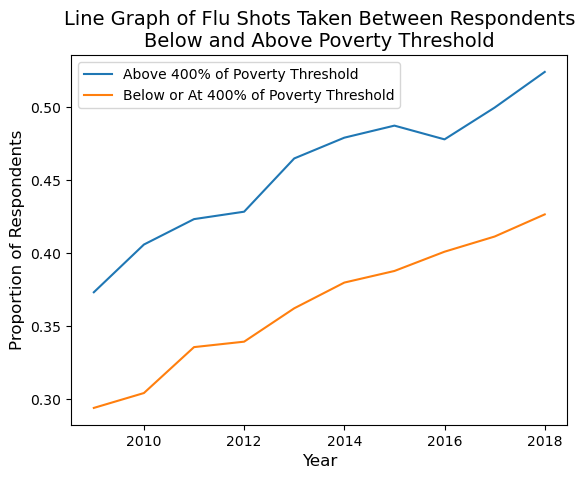

In [194]:
# Create the First Graph
y_shots_rich = grouped_rich["PropVACFLUSH12M"].to_list()
y_shots_poor = grouped_poor["PropVACFLUSH12M"].to_list()
x = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.plot(x, y_shots_rich, label = "Above 400% of Poverty Threshold")
plt.plot(x, y_shots_poor, label = "Below or At 400% of Poverty Threshold")
x = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
plt.xlabel("Year", fontsize=12)
plt.ylabel("Proportion of Respondents", fontsize=12)
plt.title("Line Graph of Flu Shots Taken Between Respondents\nBelow and Above Poverty Threshold", fontsize=14)
plt.legend()
plt.savefig('results/fig1.png', dpi=300)
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_112092\3768866503.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = poor.groupby("YEAR").sum().copy()


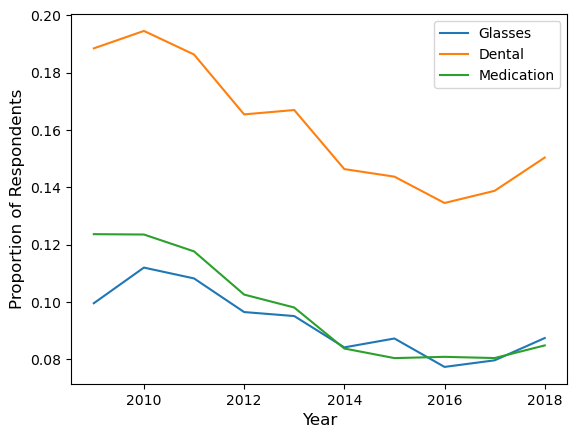

In [195]:
# Create the Second Graph part 1
grouped = poor.groupby("YEAR").sum().copy()
grouped["PropNoGlasses"] = grouped["NoGlasses"] / grouped["Obs"]
grouped["PropNoDental"] = grouped["NoDental"] / grouped["Obs"]
grouped["PropNoYBARMEDS"] = grouped["NoYBARMEDS"] / grouped["Obs"]
grouped["PropNoVACFLUSH12M"] = grouped["NoVACFLUSH12M"] / grouped["Obs"]
y_glasses = grouped["PropNoGlasses"].to_list()
y_dental = grouped["PropNoDental"].to_list()
y_meds = grouped["PropNoYBARMEDS"].to_list()
y_shots = grouped["PropNoVACFLUSH12M"].to_list()
x = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# plot lines 
plt.plot(x, y_glasses, label="Glasses")
plt.plot(x, y_dental, label="Dental")
plt.plot(x, y_meds, label="Medication")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Proportion of Respondents", fontsize=12)
plt.legend()
plt.savefig('results/fig2a.png', dpi=300)
plt.show()

C:\Users\justi\AppData\Local\Temp\ipykernel_112092\1235688183.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = rich.groupby("YEAR").sum().copy()


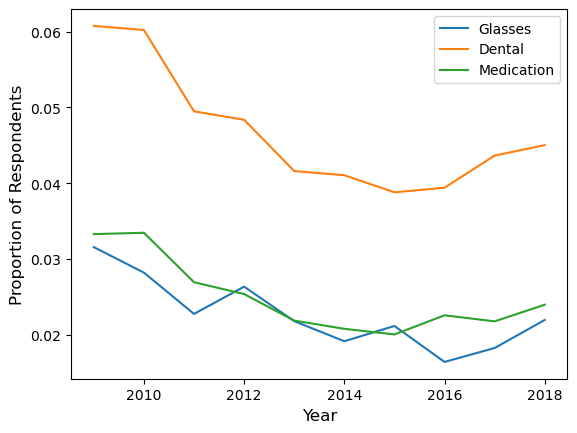

In [196]:
# Creating the Second Graph part 2
grouped = rich.groupby("YEAR").sum().copy()
grouped["PropNoGlasses"] = grouped["NoGlasses"] / grouped["Obs"]
grouped["PropNoDental"] = grouped["NoDental"] / grouped["Obs"]
grouped["PropNoYBARMEDS"] = grouped["NoYBARMEDS"] / grouped["Obs"]
grouped["PropNoVACFLUSH12M"] = grouped["NoVACFLUSH12M"] / grouped["Obs"]
y_glasses = grouped["PropNoGlasses"].to_list()
y_dental = grouped["PropNoDental"].to_list()
y_meds = grouped["PropNoYBARMEDS"].to_list()
y_shots = grouped["PropNoVACFLUSH12M"].to_list()
x = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# plot lines 
plt.plot(x, y_glasses, label="Glasses")
plt.plot(x, y_dental, label="Dental")
plt.plot(x, y_meds, label="Medication")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Proportion of Respondents", fontsize=12)
plt.legend()
plt.savefig('results/fig2b.png', dpi=300)
plt.show()

In [197]:
# Converting Variables for logistic regression
selection["Glasses"] = np.where(selection["YBARGLASS"] == 1.0, 1, 0)
selection["Dental"] = np.where(selection["YBARDENTAL"] == 1.0, 1, 0)
selection["MEDS"] = np.where(selection["YBARMEDS"] == 1, 1, 0)
lst = [str(item) for item in selection["YEAR"].to_list()]
selection["Year"] = lst
selection["Income"] = selection["INCIMPPOINT1"]/1000
selection["Expanded"] = np.where(selection["REGION"] != 3, 1, 0)
selection["ACA"] = np.where(selection["YEAR"] != 2009, 1, 0)
selection["MedicadeExpanded"] = selection["ACA"] * selection["Expanded"]
selection

,REGION,YEAR,LIVINGQTR,RACEA,EDUCREC2,POORYN,INCIMPPOINT1,POVERTY,YBARDENTAL,YBARGLASS,...,NoYBARMEDS,NoVACFLUSH12M,Obs,Glasses,Dental,MEDS,Year,Income,Expanded,MedicadeExpanded
805737,3,2009,21.0,Black/African American,College Degree,1.0,24000.0,31,1.0,1.0,...,0,1,1,1,1,1,2009,24.0,0,0
805740,3,2009,21.0,White,College Degree,1.0,30000.0,22,2.0,2.0,...,1,0,1,0,0,0,2009,30.0,0,0
805741,3,2009,21.0,White,Middle School,1.0,30000.0,22,1.0,1.0,...,0,1,1,1,1,1,2009,30.0,0,0
805747,3,2009,21.0,White,Bachelor Degree,1.0,115000.0,37,1.0,1.0,...,0,0,1,1,1,1,2009,115.0,0,0
805750,4,2009,21.0,White,College Degree,1.0,42000.0,33,1.0,1.0,...,0,1,1,1,1,1,2009,42.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762652,2,2018,21.0,White,College Degree,2.0,3500.0,11,1.0,1.0,...,0,1,1,1,1,1,2018,3.5,1,1
1762653,2,2018,21.0,White,College Degree,2.0,5000.0,11,1.0,1.0,...,0,0,1,1,1,1,2018,5.0,1,1
1762655,3,2018,21.0,White,Bachelor Degree,2.0,4000.0,11,1.0,1.0,...,0,1,1,1,1,1,2018,4.0,0,0
1762656,2,2018,21.0,White,Bachelor Degree,1.0,162000.0,37,1.0,1.0,...,0,0,1,1,1,1,2018,162.0,1,1


In [198]:
# Regression Loop
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
result = ""

for i in years:
    filt = (selection["YEAR"] == i)
    dat = selection[filt]
    log_reg_glasses = (smf.logit(formula = "Glasses ~ Income + C(REGION) + C(EDUCREC2) + C(RACEA)",data = dat, missing = 'drop'))
    log_reg_dental = (smf.logit(formula = "Dental ~ Income + C(REGION) + C(EDUCREC2) + C(RACEA)",data = dat, missing = 'drop'))
    log_reg_meds = (smf.logit(formula = "MEDS ~ Income + C(REGION) + C(EDUCREC2) + C(RACEA)", data = dat, missing = 'drop'))

    fitted_log_reg_glasses = log_reg_glasses.fit()
    fitted_log_reg_dental = log_reg_dental.fit()
    fitted_log_reg_meds = log_reg_meds.fit()
    
    stargazer = Stargazer([fitted_log_reg_glasses, fitted_log_reg_dental, fitted_log_reg_meds])
    stargazer.covariate_order(['Income'])
    stargazer.rename_covariates({'Income': 'Income 1k'})
    stargazer.add_line('Controls', ['Yes', 'Yes', 'Yes'], LineLocation.FOOTER_TOP)
    stargazer.title('Logistic Regression Analysis of Health Care Affordability for Year {}'.format(i))

    result = result + "\n" + stargazer.render_latex()
    
print(result)

Optimization terminated successfully.
         Current function value: 0.248362
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380257
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281121
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.263819
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.387844
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282542
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.252014
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.370936
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270033
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.242226
  

In [199]:
with open('results/table_1_latex.txt', 'w') as f:
    f.write(result)